In [1]:
import numpy as np
import pandas as pd
import time
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

Walmart, as one of the premier retail chains in the US, relies heavily on accurate sales predictions to ensure
a smooth customer experience and maintain a healthy bottom line. Given the vast size and geographical
spread of Walmart, coupled with the numerous factors influencing sales, accurate sales forecasting can be
quite challengi

The dataset provided for this project comes from 45 Walmart stores across various regions. The core
objective is to harness this data to predict sales and demand more effectively, particularly during peak events
and holidays, which traditionally see a spike in sales.
• Dataset URL: https://www.kaggle.com/datasets/yasserh/walmart-dataset/d
ata
Features:
• Store: Represents one of the 45 different Walmart stores.
• Date: The specific date of sales data.
• Holiday_Flag: A binary indicator, with '1' denoting a holiday and '0' signifying a non-holiday.
• Temperature: The recorded temperature on the given date.
• Fuel_Price: The cost of fuel on the particular day.
• CPI (Consumer Price Index): Measures the average change in prices over time that consumers pay for
a basket of goods and services.
• Unemployment: The unemployment index which provides insights into the overall econ
omic health.
Target Variable:
• Weekly_Sales: Represents the sales figure for a given store on a specific date.g.

In [2]:
# Loading dataset
df = pd.read_csv('Walmart.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [3]:
# Check for Missing Values
missing_values = df.isnull().sum()
missing_values

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [4]:
# The 'Date' column provided in the dataset was split into three distinct columns to capture the Year, Month, and Day of the Week. 
# This granular breakup of the date provides more specific temporal information, potentially aiding the model in identifying sales 
# patterns related to particular months or days of the week.

df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day_of_week'] = df['Date'].dt.dayofweek
df = df.drop(['Date'], axis=1)
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day_of_week
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,4
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,4
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,4
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,4
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,4
...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,4
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,2012,10,4
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,2012,10,4
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,4


In [5]:
# Certain categorical variables such as Store, Year, Month, and Day of the Week were transformed using one-hot encoding. 
# The one-hot encoding was done using the `pandas.get_dummies’ method. 
# This technique converts categorical variables into a format that can be better understood, transforming each category into its own binary column.

df = pd.get_dummies(df, columns=['Store', 'year', 'month', 'day_of_week'], drop_first=True)
df

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Store_2,Store_3,Store_4,Store_5,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1643690.90,0,42.31,2.572,211.096358,8.106,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1641957.44,1,38.51,2.548,211.242170,8.106,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1611968.17,0,39.93,2.514,211.289143,8.106,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1409727.59,0,46.63,2.561,211.319643,8.106,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1554806.68,0,46.50,2.625,211.350143,8.106,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,713173.95,0,64.88,3.997,192.013558,8.684,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
6431,733455.07,0,64.89,3.985,192.170412,8.667,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
6432,734464.36,0,54.47,4.000,192.327265,8.667,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
6433,718125.53,0,56.47,3.969,192.330854,8.667,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [6]:
# Boolean Values are generated by pandas.get_dummies() method. These are converted to 0/1.

bool_columns = df.columns[df.dtypes == 'bool'].tolist()
df[bool_columns] = df[bool_columns].astype(int)
df

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Store_2,Store_3,Store_4,Store_5,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1643690.90,0,42.31,2.572,211.096358,8.106,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1641957.44,1,38.51,2.548,211.242170,8.106,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1611968.17,0,39.93,2.514,211.289143,8.106,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1409727.59,0,46.63,2.561,211.319643,8.106,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1554806.68,0,46.50,2.625,211.350143,8.106,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,713173.95,0,64.88,3.997,192.013558,8.684,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6431,733455.07,0,64.89,3.985,192.170412,8.667,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6432,734464.36,0,54.47,4.000,192.327265,8.667,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6433,718125.53,0,56.47,3.969,192.330854,8.667,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [7]:
# The MinMax Scaler was employed to normalize the dataset values to fall within the range of [0,1].
# Scaling is vital for many algorithms, ensuring that all features have the same scale, which can lead to faster convergence and improved model performance.
    
X = df.drop(columns=["Weekly_Sales"])
y = df["Weekly_Sales"]

# Normalize both input and output variables
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()

X = scaler_X.fit_transform(X)
y = scaler_Y.fit_transform(y.values.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5148, 62), (1287, 62), (5148, 1), (1287, 1))

In [8]:
# Define the number of input features
h = X_train.shape[1]

# Define different network architectures for the experiment
architectures = [
    [h, h, 1],
    [h, 2*h, 1],
    [h, 3*h, 1],
    [h, 4*h, 1],
    [h, 5*h, 1],
    [h, 6*h, 1],
    [h, h, h, 1],
    [h, h, h, h, 1],
    [h, h, h, h, h, 1],
    [h, h, h, h, h, h, 1],
    [h, h, h, h, h, h, h, 1]
]

results = []

print('===========================================================')
print('Architecture - ', architectures[0])
print('Training...................................................')

# Training the first model (h-h-1) to get the E1 value
start_time = time.time()

# Build the model
model = tf.keras.Sequential()
for units in architectures[0][:-1]:
    model.add(tf.keras.layers.Dense(units, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer and Mean Squared Error loss
model.compile(optimizer='adam', loss='mse')

# Define early stopping to halt training if loss does not improve significantly
early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, min_delta=0.0001)

# Train the model using 10% of data for each batch, for a maximum of 500 epochs
history = model.fit(X_train, y_train, batch_size=int(0.1 * len(X_train)), epochs=500, verbose=1, shuffle=True, callbacks=[early_stop])

end_time = time.time()

# Calculate the metrics
weight_updates = sum([np.prod(w.shape) for w in model.get_weights()]) * len(history.history['loss'])

# Calculate total training time
training_time = end_time - start_time

# Evaluate the model on the test dataset to get MSE
print('\nMSE on Test...................................................')
mse_test = model.evaluate(X_test, y_test, verbose=1)

# Store the results for this architecture
results.append([architectures[0], weight_updates, training_time, mse_test])

E1 = history.history['loss'][-1]
print('\nMSE on the training data', E1)

Architecture -  [62, 62, 1]
Training...................................................
Epoch 1/500
11/11 [==============================] - 2s 5ms/step - loss: 0.0739
Epoch 2/500
11/11 [==============================] - 0s 5ms/step - loss: 0.0302
Epoch 3/500
11/11 [==============================] - 0s 5ms/step - loss: 0.0237
Epoch 4/500
11/11 [==============================] - 0s 5ms/step - loss: 0.0217
Epoch 5/500
11/11 [==============================] - 0s 6ms/step - loss: 0.0190
Epoch 6/500
11/11 [==============================] - 0s 7ms/step - loss: 0.0169
Epoch 7/500
11/11 [==============================] - 0s 5ms/step - loss: 0.0149
Epoch 8/500
11/11 [==============================] - 0s 5ms/step - loss: 0.0130
Epoch 9/500
11/11 [==============================] - 0s 5ms/step - loss: 0.0110
Epoch 10/500
11/11 [==============================] - 0s 5ms/step - loss: 0.0089
Epoch 11/500
11/11 [==============================] - 0s 6ms/step - loss: 0.0069
Epoch 12/500
11/11 [==========

In [9]:
# Loop through all architectures, skipping the first one since we've already trained it previously
for arch in architectures[1:]:
    print('===========================================================')
    print('Architecture - ', arch)
    print('Training...................................................')
    start_time = time.time()

    # Build the model
    model = tf.keras.Sequential()
    for units in arch[:-1]:
        model.add(tf.keras.layers.Dense(units, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # Compile the model with Adam optimizer and Mean Squared Error loss
    model.compile(optimizer='adam', loss='mse')
    
    # Define a custom callback to stop training early when the loss becomes close to E1 (from previous model training)
    class CustomCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs=None):
            if logs['loss'] <= E1 + 0.0001:
                self.model.stop_training = True

    # Train the model using 10% of data for each batch, for a maximum of 500 epochs, and with the custom callback
    history = model.fit(X_train, y_train, batch_size=int(0.1 * len(X_train)), epochs=500, verbose=1, shuffle=True, callbacks=[CustomCallback()])
    end_time = time.time()

    # Calculate the metrics
    weight_updates = sum([np.prod(w.shape) for w in model.get_weights()]) * len(history.history['loss'])
    training_time = end_time - start_time
    
    print('\nMSE on Test...................................................')
    mse_test = model.evaluate(X_test, y_test, verbose=1)

    results.append([arch, weight_updates, training_time, mse_test])

Architecture -  [62, 124, 1]
Training...................................................
Epoch 1/500
11/11 [==============================] - 2s 6ms/step - loss: 0.0855
Epoch 2/500
11/11 [==============================] - 0s 7ms/step - loss: 0.0309
Epoch 3/500
11/11 [==============================] - 0s 6ms/step - loss: 0.0237
Epoch 4/500
11/11 [==============================] - 0s 7ms/step - loss: 0.0209
Epoch 5/500
11/11 [==============================] - 0s 6ms/step - loss: 0.0180
Epoch 6/500
11/11 [==============================] - 0s 6ms/step - loss: 0.0159
Epoch 7/500
11/11 [==============================] - 0s 6ms/step - loss: 0.0138
Epoch 8/500
11/11 [==============================] - 0s 6ms/step - loss: 0.0116
Epoch 9/500
11/11 [==============================] - 0s 5ms/step - loss: 0.0095
Epoch 10/500
11/11 [==============================] - 0s 6ms/step - loss: 0.0074
Epoch 11/500
11/11 [==============================] - 0s 6ms/step - loss: 0.0057
Epoch 12/500
11/11 [=========

In [21]:
# Results Stored in a Dataframe
results_df = pd.DataFrame(results, columns=['Architecture', 'No. of weight updates needed to reach training MSE=E1', 'Time taken for training (seconds)', 'MSE on test data at the end of training'])
results_df

,Architecture,No. of weight updates needed to reach training MSE=E1,Time taken for training (seconds),MSE on test data at the end of training
0,"[62, 62, 1]",433125,5.859171,0.001105
1,"[62, 124, 1]",497406,4.663211,0.001168
2,"[62, 186, 1]",664062,4.670596,0.001126
3,"[62, 248, 1]",613149,4.115913,0.001148
4,"[62, 310, 1]",878639,4.591067,0.001219
5,"[62, 372, 1]",942310,4.216984,0.001158
6,"[62, 62, 62, 1]",530145,5.011729,0.001255
7,"[62, 62, 62, 62, 1]",596106,5.207839,0.001209
8,"[62, 62, 62, 62, 62, 1]",626976,5.191841,0.001153
9,"[62, 62, 62, 62, 62, 62, 1]",681471,5.572876,0.001224


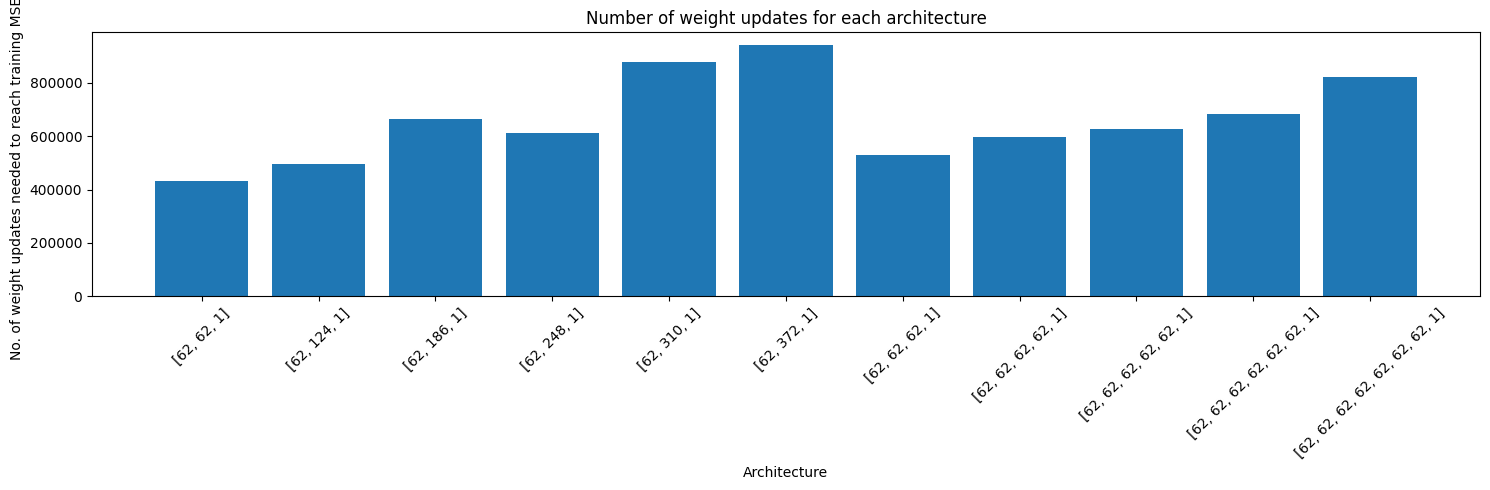

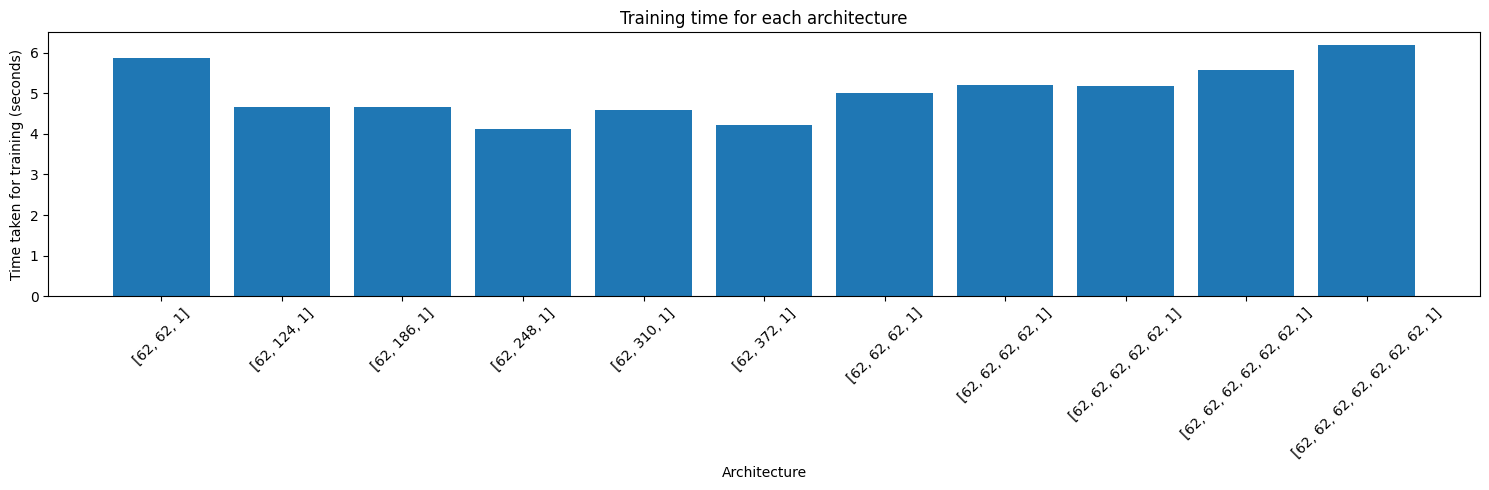

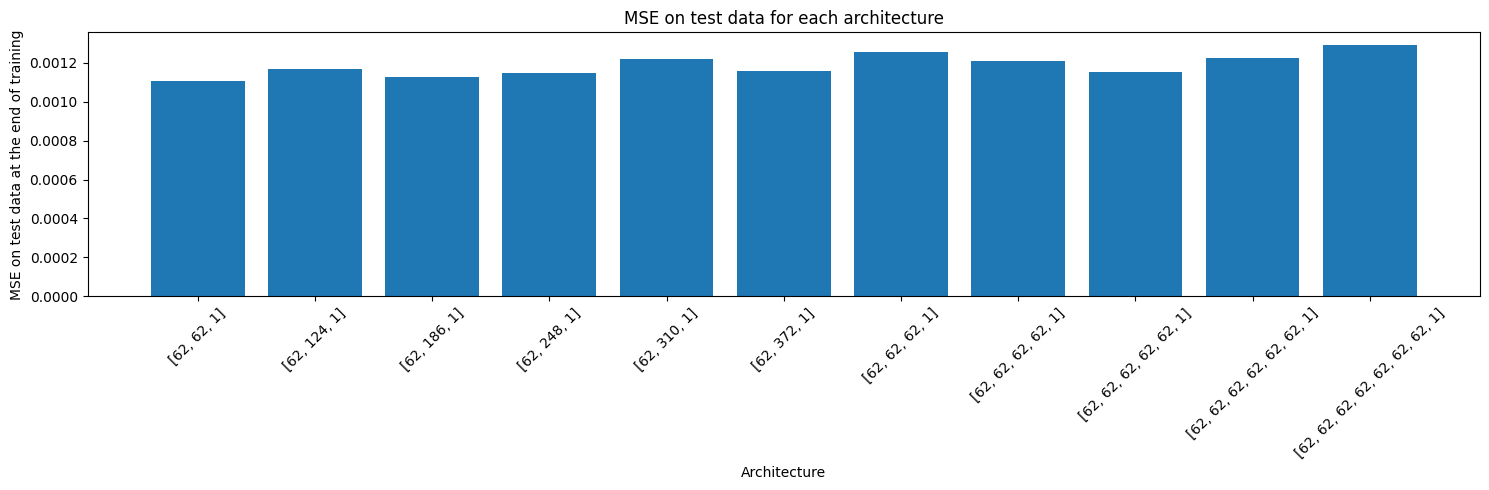

In [20]:
# 1. Number of weight updates
plt.figure(figsize=(15, 5))
plt.bar(range(len(results_df['Architecture'])), results_df['No. of weight updates needed to reach training MSE=E1'])
plt.title('Number of weight updates for each architecture')
plt.ylabel('No. of weight updates needed to reach training MSE=E1')
plt.xlabel('Architecture')
plt.xticks(range(len(results_df['Architecture'])), results_df['Architecture'], rotation=45)
plt.tight_layout()
plt.show()

# 2. Training time
plt.figure(figsize=(15, 5))
plt.bar(range(len(results_df['Architecture'])), results_df['Time taken for training (seconds)'])
plt.title('Training time for each architecture')
plt.ylabel('Time taken for training (seconds)')
plt.xlabel('Architecture')
plt.xticks(range(len(results_df['Architecture'])), results_df['Architecture'], rotation=45)
plt.tight_layout()
plt.show()

# 3. MSE on test data
plt.figure(figsize=(15, 5))
plt.bar(range(len(results_df['Architecture'])), results_df['MSE on test data at the end of training'])
plt.title('MSE on test data for each architecture')
plt.ylabel('MSE on test data at the end of training')
plt.xlabel('Architecture')
plt.xticks(range(len(results_df['Architecture'])), results_df['Architecture'], rotation=45)
plt.tight_layout()
plt.show()
